# Aumento demográfico en la ciudad de Girona

En este notebook vamos a crear tablas donde podamos visualizar el aumento demográfico que ha experimentado la ciudad en los últimos años.

## Datos empadronamiento (Fuente: INE)

Instalamos e importamos las librerías Numpy y Pandas para el tratamiento de datos.

In [17]:
#!pip install numpy
#!pip install pandas

import numpy as np
import pandas as pd

El archivo *padron-96-22.csv* nos muestra los empadronados en Girona desde 1996 hasta 2022. Tenemos que leerlo con Pandas para poder trabajar con él.

In [18]:
padron = pd.read_csv('../data/padron-96-22.csv', sep = ';')

In [19]:
padron

,Municipios,Sexo,Periodo,Total
0,17079 Girona,Total,2022,102.666
1,17079 Girona,Total,2021,101.932
2,17079 Girona,Total,2020,103.369
3,17079 Girona,Total,2019,101.852
4,17079 Girona,Total,2018,100.266
5,17079 Girona,Total,2017,99.013
6,17079 Girona,Total,2016,98.255
7,17079 Girona,Total,2015,97.586
8,17079 Girona,Total,2014,97.227
9,17079 Girona,Total,2013,97.292


Observamos que en el año 1997 no tenemos datos del padrón. Empezaremos el gráfico a partir de 1998 ya que no hay un cambio sustancial en los dos años anteriores.
Para crear los gráficos de barras emplearemos las librerías Matplotlib (estático) y Plotly (interactivo).

## Gráfico de barras con Matplotlib

In [20]:
#!pip install matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt

Una vez importadas las librerías, dibujamos el gráfico añadiendo los parámetros deseados.

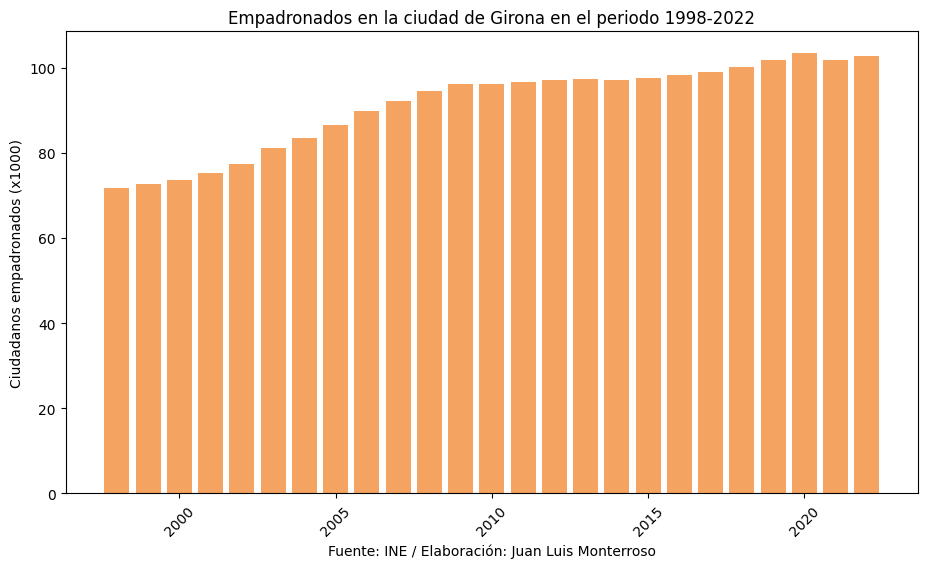

In [21]:
plt.figure(figsize=(11,6))
plt.bar(padron.Periodo[0:-2], padron.Total[0:-2], color = "#F4A460")
plt.xlabel('Fuente: INE / Elaboración: Juan Luis Monterroso')
plt.ylabel('Ciudadanos empadronados (x1000)')
plt.title('Empadronados en la ciudad de Girona en el periodo 1998-2022')
plt.xticks(rotation=45)
#plt.savefig('../images/empadronadosgir19962022.svg', format='svg') # Lo guardamos en formato svg para su mejor adaptación a la web

## Gráfico de barras interactivo con Plotly

Crearemos el mismo gráfico con Plotly para que sea interactivo. Instalamos e importamos la librería correspondiente. Seguidamente, creamos el gráfico modificando los colores predeterminados, añadiendo título, autoría y demás parámetros personalizables.

In [23]:
#!pip install plotly
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Bar(
    x=padron.Periodo[0:-2],
    y=padron.Total[0:-2],
    marker=dict(color='#F4A460'),
))


fig.update_layout(
    title=dict(
        text='Empadronados en la ciudad de Girona <br> en el período 1998-2022',
        font=dict(family='Calibri', size=18, color='black')
    ),
    
    yaxis_title='Ciudadanos empadronados (x1000)',
    xaxis_tickangle=-45,
    #width=900,
    #height=500,
    plot_bgcolor='white', 
    annotations=[
        dict(
            x=0.5,
            y=-0.23,
            xref='paper',
            yref='paper',
            text='Fuente: INE <br> Elaboración: Juan Luis Monterroso',
            showarrow=False,
            font=dict(family='Calibri', size=12, color='black')
        )
    ]
)


fig.show() 

# Opcionalmente, guardar el gráfico en un archivo HTML
fig.write_html('../images/empadronados19962022plotly.html')